In [19]:
# imports general modules, runs ipython magic commands
# change path in this notebook to point to repo locally
# n.b. sometimes need to run this cell twice to init the plotting paramters
import sys; sys.path.append('/home/pshah/Documents/code/Vape/utils/')
import alloptical_utils_pj as ao
import numpy as np
import utils_funcs as uf
import matplotlib.pyplot as plt
%run ~/Documents/code/Vape/jupyter/setup_notebook.ipynb
print(sys.path)
import funcs_pj as pjf

plt.rcParams['figure.figsize'] = [20.0, 3.0]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
['/home/pshah/Documents/code/Vape/jupyter/Prajay', '/Applications/NEURON-7.6/nrn/lib/python', '/home/pshah/Documents/code/Vape/jupyter/Prajay', '/home/pshah/anaconda3/lib/python37.zip', '/home/pshah/anaconda3/lib/python3.7', '/home/pshah/anaconda3/lib/python3.7/lib-dynload', '', '/home/pshah/anaconda3/lib/python3.7/site-packages', '/home/pshah/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/home/pshah/.ipython', '/home/pshah/Documents/code/Vape/utils/', '/home/pshah/Documents/code/Vape/utils/', '/home/pshah/Documents/code/Vape/', '/home/pshah/Documents/code/Vape/utils/', '/home/pshah/Documents/code/Vape/', '/home/pshah/Documents/code/Vape/utils', '/home/pshah/Documents/code/Vape/utils/', '/home/pshah/Documents/code/Vape/', '/home/pshah/Documents/code/Vape/utils']


### suite2p run

In [20]:
# tiffs to run s2p on
#to_suite2p = ['t-015', 't-016', 't-018']
to_suite2p = ['t-019', 't-020', 't-021']
#to_suite2p = ['t-002']
#to_suite2p = ['t-007', 't-008', 't-011']

to_suite2p_tiffs = []
for i in to_suite2p:
    to_suite2p_tiffs.append('/home/pshah/mnt/qnap/Data/2020-03-18/J063/2020-03-18_J063_%s/2020-03-18_J063_%s_Cycle00001_Ch3.tif' % (i,i))

In [21]:
import os

# data_path = [os.path.expanduser('/home/pshah/mnt/qnap/Data/2020-03-19/2020-03-19_%s/' % to_suite2p[0],
#                                 '/home/pshah/mnt/qnap/Data/2020-03-19/2020-03-19_%s/' % to_suite2p[1],
#                                 '/home/pshah/mnt/qnap/Data/2020-03-19/2020-03-19_%s/' % to_suite2p[2])]
data_path = []
for i in to_suite2p:
    data_path.append('/home/pshah/mnt/qnap/Data/2020-03-18/J063/2020-03-18_J063_%s/' % i)


tiff_list = to_suite2p_tiffs

# setup settings and run suite2p
from suite2p.run_s2p import run_s2p

cell_diameter = 5.5
imaging_fps = 30.
save_folder = os.path.join('/home/pshah/mnt/qnap/Data/2020-03-18/J063', 'suite2p/photostim-4ap-stitched')  # name of the folder to save results in (default = suite2p in data_path)

ops = {
    'batch_size': 2000,  # reduce if running out of RAM
    'fast_disk': os.path.expanduser('~/Documents/suite2p_binaries'),
    # used to store temporary binary file, defaults to save_path0 (set as a string NOT a list)
    # 'save_path0': '/media/jamesrowland/DATA/plab/suite_2p', # stores results, defaults to first item in data_path
    'delete_bin': True,  # whether to delete binary file after processing
    # main settings
    'nplanes': 1,  # each tiff has these many planes in sequence
    'nchannels': 1,  # each tiff has these many channels per plane
    'functional_chan': 1,  # this channel is used to extract functional ROIs (1-based)
    'diameter': cell_diameter,
    # this is the main parameter for cell detection, 2-dimensional if Y and X are different (e.g. [6 12])
    'tau': 1.26,  # this is the main parameter for deconvolution (1.25-1.5 for gcamp6s)
    'fs': imaging_fps,  # sampling rate (total across planes)
    # output settings
    'save_mat': True,  # whether to save output as matlab files
    'combined': True,  # combine multiple planes into a single result /single canvas for GUI
    # parallel settings
    'num_workers': 50,  # 0 to select num_cores, -1 to disable parallelism, N to enforce value
    'num_workers_roi': 0,  # 0 to select number of planes, -1 to disable parallelism, N to enforce value
    # registration settings
    'do_registration': True,  # whether to register data
    'nimg_init': 200,  # subsampled frames for finding reference image
    'maxregshift': 0.1,  # max allowed registration shift, as a fraction of frame max(width and height)
    'align_by_chan': 1,  # when multi-channel, you can align by non-functional channel (1-based)
    'reg_tif': False,  # whether to save registered tiffs
    'subpixel': 10,  # precision of subpixel registration (1/subpixel steps)
    # 'two_step_registration': True,
    # 'keep_movie_raw': True,
    # cell detection settings
    'connected': True,  # whether or not to keep ROIs fully connected (set to 0 for dendrites)
    'navg_frames_svd': 5000,  # max number of binned frames for the SVD
    'nsvd_for_roi': 1000,  # max number of SVD components to keep for ROI detection
    'max_iterations': 20,  # maximum number of iterations to do cell detection
    'ratio_neuropil': 6.,  # ratio between neuropil basis size and cell radius
    'ratio_neuropil_to_cell': 3,  # minimum ratio between neuropil radius and cell radius
    'tile_factor': 1.,  # use finer (>1) or coarser (<1) tiles for neuropil estimation during cell detection
    'threshold_scaling': 1.,  # adjust the automatically determined threshold by this scalar multiplier
    'max_overlap': 0.75,  # cells with more overlap than this get removed during triage, before refinement
    'inner_neuropil_radius': 2,  # number of pixels to keep between ROI and neuropil donut
    'outer_neuropil_radius': np.inf,  # maximum neuropil radius
    'min_neuropil_pixels': 350,  # minimum number of pixels in the neuropil
    # deconvolution settings
    'baseline': 'maximin',  # baselining mode
    'win_baseline': 60.,  # window for maximin
    'sig_baseline': 10.,  # smoothing constant for gaussian filter
    'prctile_baseline': 8.,  # optional (whether to use a percentile baseline)
    'neucoeff': .7,  # neuropil coefficient
}

# make the local suite2p binaries file if it does not already exist
if not os.path.exists(ops['fast_disk']):
    os.mkdir(ops['fast_disk'])

diameter = cell_diameter  # the average diameter (in pixels) of a cell -- check in fiji
fs = int(imaging_fps)  # sampling rate of imaging (default 30 fps)
nplanes = 1  # number of planes (default 1)
nchannels = 1  # number of channels aquired (default 1)

db = {
    'data_path': data_path,
    'tiff_list': tiff_list,
    'diameter': diameter,
    'fs': fs,
    'nplanes': nplanes,
    'nchannels': nchannels,
    'save_folder': save_folder
}

In [22]:
import time as time
# run suite2p
t1 = time.time()
opsEnd=run_s2p(ops=ops,db=db)
t2 = time.time()
print('Total time this cell was running is {}'.format(t2-t1))

{'data_path': ['/home/pshah/mnt/qnap/Data/2020-03-18/J063/2020-03-18_J063_t-019/', '/home/pshah/mnt/qnap/Data/2020-03-18/J063/2020-03-18_J063_t-020/', '/home/pshah/mnt/qnap/Data/2020-03-18/J063/2020-03-18_J063_t-021/'], 'tiff_list': ['/home/pshah/mnt/qnap/Data/2020-03-18/J063/2020-03-18_J063_t-019/2020-03-18_J063_t-019_Cycle00001_Ch3.tif', '/home/pshah/mnt/qnap/Data/2020-03-18/J063/2020-03-18_J063_t-020/2020-03-18_J063_t-020_Cycle00001_Ch3.tif', '/home/pshah/mnt/qnap/Data/2020-03-18/J063/2020-03-18_J063_t-021/2020-03-18_J063_t-021_Cycle00001_Ch3.tif'], 'diameter': 5.5, 'fs': 30, 'nplanes': 1, 'nchannels': 1, 'save_folder': '/home/pshah/mnt/qnap/Data/2020-03-18/J063/suite2p/photostim-4ap-stitched'}
tif
** Found 3 tifs - converting to binary **
8000 frames of binary, time 269.29 sec.
16000 frames of binary, time 512.33 sec.
time 2760.04 sec. Wrote tifs to binaries for 1 planes
>>>>>>>>>>>>>>>>>>>>> PLANE 0 <<<<<<<<<<<<<<<<<<<<<<
----------- REGISTRATION
registering 91032 frames
Reference

/home/pshah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


After removing overlaps, 3086 ROIs remain
Masks made in 68.09 sec.
Extracted fluorescence from 3086 ROIs in 91032 frames, 366.02 sec.
----------- Total 722.83 sec.
----------- SPIKE DECONVOLUTION
----------- Total 148.15 sec.
Plane 0 processed in 3344.52 sec (can open in GUI).
total = 929.26 sec.
TOTAL RUNTIME 933.04 sec
Total time this cell was running is 6108.36708521843


In [ ]:
to_vape = ['t-012', 't-013', 't-014', 't-016']

#### Exp: after 4AP - classic_naparm_001 - trial 1/3

In [ ]:
paths = []
tiffs_loc = '/home/pshah/mnt/qnap/Data/2020-03-04/2020-03-04_t-012'
tiffs_loc2 = '/home/pshah/mnt/qnap/Data/2020-03-04/2020-03-04_t-012/2020-03-04_t-012_Cycle00001_Ch3.tif'
naparms_loc = '/home/pshah/mnt/qnap/Data/2020-03-04/2020-03-04_classic_naparm_001'
paqs_loc = '/home/pshah/mnt/qnap/Data/2020-03-04/2020-03-04_t-012.paq'

paths.append([tiffs_loc, naparms_loc, paqs_loc])
paths

In [ ]:
exp_obj = ao.alloptical(paths[0], stim='2pstim')
for key, values in vars(exp_obj).items():
    print(key)

exp_obj._parseNAPARMgpl()
exp_obj._parseNAPARMxml()
exp_obj._parsePVMetadata()
exp_obj.stimProcessing(stim_channel='markpoints2packio')

In [40]:
photostim_frames = []
for j in exp_obj.stim_start_frames[0]:
    for i in range(exp_obj.duration_frames+1): # usually need to remove 1 more frame than the stim duration, as the stim isn't perfectly aligned with the start of the imaging frame
        photostim_frames.append(j+i)

np.save('%s/bad_frames.npy' % tiffs_loc, photostim_frames)   # save to npy file and remember to move npy file to tiff folder before running with suite2p

print('/// New frame total:', exp_obj.n_frames-len(photostim_frames), 'frames ///')


/// New frame total: 1619 frames ///


In [41]:
### make a new tiff file (not for suite2p) with the first photostim frame whitened, and save new tiff
tiff_path = '/home/pshah/mnt/qnap/Data/2020-03-04/2020-03-04_t-012/2020-03-04_t-012_Cycle00001_Ch3.tif'

import tifffile as tf
im_stack = tf.imread(tiff_path, key=range(exp_obj.n_frames))


frames_to_whiten = []
for j in exp_obj.stim_start_frames[0]:
        frames_to_whiten.append(j)

im_stack_1 = im_stack
a = np.full_like(im_stack_1[0], fill_value=0)
a[0:100,0:100] = 5000.
for frame in frames_to_whiten:
    im_stack_1[frame-3] = im_stack_1[frame-3]+a
    im_stack_1[frame-2] = im_stack_1[frame-2]+a
    im_stack_1[frame-1] = im_stack_1[frame-1]+a    
    
frames_to_remove = []
for j in exp_obj.stim_start_frames[0]:
    for i in range(0, exp_obj.duration_frames+1): # usually need to remove 1 more frame than the stim duration, as the stim isn't perfectly aligned with the start of the imaging frame
        frames_to_remove.append(j+i)

im_stack_1 = np.delete(im_stack, frames_to_remove, axis=0)

tf.imwrite("/home/pshah/mnt/qnap/Data/2020-03-04/2020-03-04_t-012/2020-03-04_t012_artifactrem2.tif",
           im_stack_1, photometric='minisblack')

# # find the frames which are now photostim frames (relative to the new length after frames removed)
# new_tiff = "/home/pshah/mnt/qnap/Data/2020-03-04/2020-03-04_t-012/2020-03-04_t012_artifactrem2.tif"
# new_stack = tf.imread(new_tiff, key=(range(len(im_stack_1))))

# new_photostim_frames = []
# for i in range(len(new_stack)):
#     if new_stack[i][0][0]==1001:
#         new_photostim_frames.append(i)

FileNotFoundError: [Errno 2] No such file or directory: '/home/pshah/mnt/qnap/Data/2020-03-04/2020-03-04_t-009/2020-03-04_t-012_Cycle00001_Ch3.tif'

### Exp: t-019, t-020, t-021 (photostim. exp - after 4AP)

In [1]:
import sys; sys.path.append('/home/pshah/Documents/code/Vape/utils/')
import run_photostim_processing

trials = ['t-019', 't-020', 't-021']

tiffs_loc = '/home/pshah/mnt/qnap/Data/2020-03-18/J063/2020-03-18_J063_%s'
tiffs_loc2 = '/home/pshah/mnt/qnap/Data/2020-03-18/J063/2020-03-18_J063_%s/2020-03-18_J063_%s_Cycle00001_Ch3.tif'
naparms_loc = '/home/pshah/mnt/qnap/Data/2020-03-18/J063/photostim/2020-03-18_photostim_002'
paqs_loc = '/home/pshah/mnt/qnap/Data/2020-03-18/2020-03-18_J063_%s.paq'


trial = 't-019'
run_photostim_processing(trial)

# for trial in trials:
#     run_photostim_processing(trial, tiffs_loc=tiffs_loc, tiffs_loc2=tiffs_loc2, naparms_loc=naparms_loc, paqs_loc=paqs_loc)


TypeError: 'module' object is not callable

In [4]:
trial = 't-019'

paths = []
tiffs_loc = '/home/pshah/mnt/qnap/Data/2020-03-18/J063/2020-03-18_J063_%s' % trial
tiffs_loc2 = '/home/pshah/mnt/qnap/Data/2020-03-18/J063/2020-03-18_J063_%s/2020-03-18_J063_%s_Cycle00001_Ch3.tif' % (trial, trial)
naparms_loc = '/home/pshah/mnt/qnap/Data/2020-03-18/J063/photostim/2020-03-18_photostim_002'
paqs_loc = '/home/pshah/mnt/qnap/Data/2020-03-18/2020-03-18_J063_%s.paq' % trial

paths.append([tiffs_loc, naparms_loc, paqs_loc])
paths

[['/home/pshah/mnt/qnap/Data/2020-03-18/J063/2020-03-18_J063_t-019',
  '/home/pshah/mnt/qnap/Data/2020-03-18/J063/photostim/2020-03-18_photostim_002',
  '/home/pshah/mnt/qnap/Data/2020-03-18/2020-03-18_J063_t-019.paq']]

n planes: 1 
n frames: 18381 
fps: 30.03797250293959 
frame size (px): 512 x 512 
zoom: 0.795378456 
pixel size (um): 2.74659789458189 2.74659789458189 
scan centre (V): 0.0 0.0
tiff_path
naparm_path
paq_path
fps
frame_x
frame_y
n_planes
pix_sz_x
pix_sz_y
scan_x
scan_y
zoom
n_frames
stim_type
['/home/pshah/mnt/qnap/Data/2020-03-18/J063/photostim/2020-03-18_photostim_002/2020-03-18_photostim_002.gpl']
/home/pshah/mnt/qnap/Data/2020-03-18/J063/photostim/2020-03-18_photostim_002/2020-03-18_photostim_002.gpl
Single stim dur (ms): 10
Spiral size (um): 0.07388
['/home/pshah/mnt/qnap/Data/2020-03-18/J063/photostim/2020-03-18_photostim_002/2020-03-18_photostim_002.xml']
/home/pshah/mnt/qnap/Data/2020-03-18/J063/photostim/2020-03-18_photostim_002/2020-03-18_photostim_002.xml
Numbers of trials: 30 
Number of groups: 2 
Number of shots: 6 
Number of sequence reps: 1 
Inter-point delay: 40
n planes: 1 
n frames: 18381 
fps: 30.03797250293959 
frame size (px): 512 x 512 
zoom: 0.795378456 
pixel si

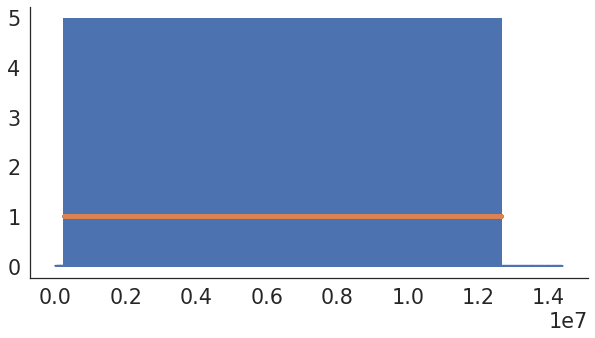

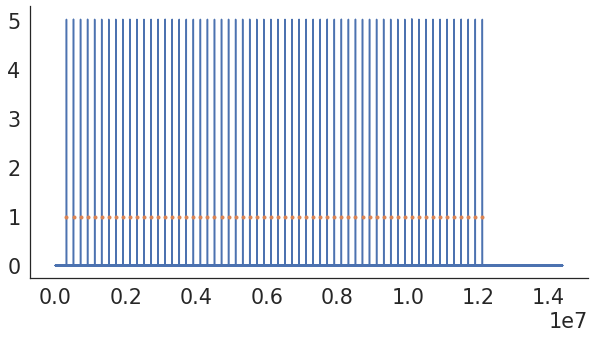

Number of targets: 32
Number of targets, SLM group #1: 16
Number of targets, SLM group #2: 16
Got targets...
/// Original # of frames: 18381 frames ///
/// # of Photostim frames: 660 frames ///
/// Minus photostim. frames total: 17721 frames ///


In [5]:
exp_obj = ao.alloptical(paths[0], stim='2pstim')
for key, values in vars(exp_obj).items():
    print(key)

exp_obj._parseNAPARMgpl()
exp_obj._parseNAPARMxml()
exp_obj._parsePVMetadata()
exp_obj.stimProcessing(stim_channel='markpoints2packio')
exp_obj._findTargets()
exp_obj.find_photostim_frames()


In [9]:
exp_obj.find_photostim_frames()
exp_obj.append_seizure_frames(bad_frames=list(range(2680,5120)))

print('Total photostim + seizure/CSD frames: ', len(exp_obj.bad_frames))
np.save('%s/bad_frames.npy' % tiffs_loc, exp_obj.bad_frames)   # save to npy file and remember to move npy file to tiff folder before running with suite2p

/// Original # of frames: 18381 frames ///
/// # of Photostim frames: 660 frames ///
/// Minus photostim. frames total: 17721 frames ///
len of seizures_frames + photostim frames 3100
len of seizures_frames 2440
len of photostim_frames 660
Total photostim + seizure/CSD frames:  3100


In [ ]:
### make tiffs with photostim artifacts removed and such...

In [12]:

# number of photostim frames with artifacts
frames_to_remove = []
for j in exp_obj.stim_start_frames[0]:
    for i in range(0, exp_obj.duration_frames+1): # usually need to remove 1 more frame than the stim duration, as the stim isn't perfectly aligned with the start of the imaging frame
        frames_to_remove.append(j+i)

print('# of total photostim artifact frames:',len(frames_to_remove))

### make a new tiff file (not for suite2p) with the first photostim frame whitened, and save new tiff
import tifffile as tf

tiff_path = tiffs_loc2
print(tiff_path)
im_stack = tf.imread(tiff_path, key=range(exp_obj.n_frames))


frames_to_whiten = []
for j in exp_obj.stim_start_frames[0]:
        frames_to_whiten.append(j)

im_stack_1 = im_stack
a = np.full_like(im_stack_1[0], fill_value=0)
a[0:100,0:100] = 5000.
for frame in frames_to_whiten:
    im_stack_1[frame-3] = im_stack_1[frame-3]+a
    im_stack_1[frame-2] = im_stack_1[frame-2]+a
    im_stack_1[frame-1] = im_stack_1[frame-1]+a    
print('Shape', im_stack_1.shape)

im_stack_1 = np.delete(im_stack_1, frames_to_remove, axis=0)
print('After delete shape artifactrem',im_stack_1.shape)

tf.imwrite("/home/pshah/mnt/qnap/Data/2020-03-18/J063/2020-03-18_J063_%s/2020-03-18_J063_%s_artifactrem.tif" % (trial, trial),
           im_stack_1, photometric='minisblack')

del(im_stack_1)
    
# draw areas on top of im_stack_1 where targets are:
im_stack_2 = im_stack
b = np.full_like(im_stack_2[0], fill_value=0)
targets = np.floor_divide(exp_obj.target_areas, 2)
for i in np.arange(len(targets)):
    b[[*targets[i].T]]=1000
for frame in frames_to_whiten:
    im_stack_2[frame-6] = im_stack_2[frame-6]+b
    im_stack_2[frame-5] = im_stack_2[frame-5]+b
    im_stack_2[frame-4] = im_stack_2[frame-4]+b
    im_stack_2[frame-3] = im_stack_2[frame-3]+b
    im_stack_2[frame-2] = im_stack_2[frame-2]+b
    im_stack_2[frame-1] = im_stack_2[frame-1]+b  
print('Shape', im_stack_2.shape)
        

im_stack_2 = np.delete(im_stack_2, frames_to_remove, axis=0)


print('After delete shape targetcells',im_stack_2.shape)


tf.imwrite("/home/pshah/mnt/qnap/Data/2020-03-18/J063/2020-03-18_J063_%s/2020-03-18_J063_%s_targetcells.tif" % (trial, trial),
           im_stack_2, photometric='minisblack')

print('done saving')

del(im_stack_2)
del(im_stack)

# # find the frames which are now photostim frames (relative to the new length after frames removed)
# new_tiff = "/home/pshah/mnt/qnap/Data/2020-03-19/2020-03-19_%s/2020-03-19_%s_artifactrem.tif" % (trial, trial)
# new_stack = tf.imread(new_tiff, key=(range(len(im_stack_1))))

# new_photostim_frames = []
# for i in range(len(new_stack)):
#     if new_stack[i][0][0]==1001:
#         new_photostim_frames.append(i)

# of total photostim artifact frames: 660
/home/pshah/mnt/qnap/Data/2020-03-18/J063/2020-03-18_J063_t-020/2020-03-18_J063_t-020_Cycle00001_Ch3.tif
Shape (23718, 512, 512)
After delete shape artifactrem (23058, 512, 512)


/home/pshah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


Shape (23718, 512, 512)
After delete shape targetcells (23058, 512, 512)
done saving


In [13]:
## save exp_obj as pickle
import pickle
# Pickle the expobject output to save it for analysis
pkl_path = '%s/2020-03-18_%s.pkl' % (tiffs_loc, trial)
with open(pkl_path, 'wb') as f:
        pickle.dump(exp_obj, f)
print("Pkl saved to %s" % pkl_path)

Pkl saved to /home/pshah/mnt/qnap/Data/2020-03-18/J063/2020-03-18_J063_t-020/2020-03-18_t-020.pkl
